<a href="https://colab.research.google.com/github/Turakulov/Python/blob/master/CNN_Flowers_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №4

Подключим все необходимые библиотеки

In [0]:
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
import cv2                    
from tqdm import tqdm
import os                   

Подключим наш гугл диск к колабу, чтобы импортировать датасет из изображений

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
# проинициализируем два массива, один для изображений, второй для названий
images_arr = []
labels_arr = []

In [0]:
def assign_label(img, flower_type):
    return flower_type
def upload_from_dir(flower_type, DIR):
    for img in tqdm(os.listdir(DIR)):
        label = assign_label(img, flower_type)
        path = os.path.join(DIR, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        # в датасете есть изображения которые меньше чем 150х150
        # поэтому будем ловить такие случаи и пропускать
        # в этом и состоит вся чистка данных
        try: 
          img = cv2.resize(img, (150,150))
        except:
          continue
        
        images_arr.append(np.array(img))
        labels_arr.append(str(label))

In [0]:
upload_from_dir('Маргаритка', '/content/drive/My Drive/Colab Notebooks/flowers/daisy')
upload_from_dir('Подсолнух', '/content/drive/My Drive/Colab Notebooks/flowers/sunflower')
upload_from_dir('Тюльпан', '/content/drive/My Drive/Colab Notebooks/flowers/tulip')
upload_from_dir('Одуванчик', '/content/drive/My Drive/Colab Notebooks/flowers/dandelion')
upload_from_dir('Роза', '/content/drive/My Drive/Colab Notebooks/flowers/rose')


100%|██████████| 784/784 [05:10<00:00,  2.52it/s]


In [0]:
print(f"Всего изображений цветов: {len(images_arr)} размером 150х150")

Всего изображений цветов: 4323 размером 150х150


Создадим массив для хранения 5ти индексов от каждого класса

In [0]:
indexes = [labels_arr.index(x) for x in sorted(set(labels_arr))]
indexes

[0, 2487, 769, 3539, 1503]

Сделаем визуализацию по 5ти классам изображений, чтобы понять как выглядят наши изображения

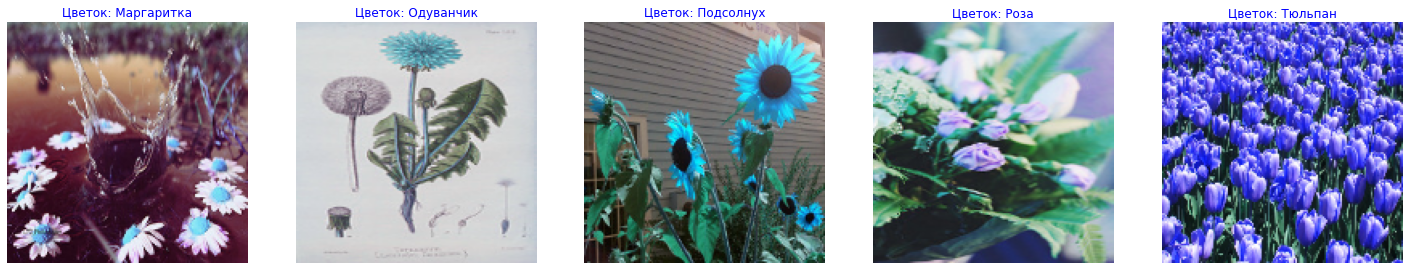

In [0]:
fig, ax = plt.subplots(1,5)
fig.set_size_inches(25, 25)
for i in range(5):
      ax[i].imshow(images_arr[indexes[i]])
      ax[i].set_title('Цветок: '+ labels_arr[indexes[i]], color='blue')
      ax[i].grid(False)
      ax[i].axis('off')

Как можно увидеть, наши изображения цветные

Превратим с помощью label encoding'а наши категориальные переменные в количественные.

In [0]:
labelEnc = LabelEncoder()

Y = labelEnc.fit_transform(labels_arr)
Y = to_categorical(Y, 5)
X = np.array(images_arr)
# разделим каждый пиксель на 255
X = X / 255

Разделим выборку на тренировочную и тестовую. На тренировочных данных модель будет обучаться, а на тестовых данных мы будем определять качество модели. Мы обучаем модель только на тренировочных данных и проверяем на тестовых для того чтобы проверить какие результаты покажет модель на данных, которые она видит впервые. Если бы мы не делили данные, то модель выдавала бы некорректные результаты, потому что проверяла бы те же самые данные на которых обучилась. 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42, stratify = Y)

Прописали `stratify` чтобы выборки разделились так что элементов разного класса было поровну

In [0]:
model = keras.Sequential([
    keras.layers.Conv2D(filters = 16, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (150, 150, 3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation ='tanh'),
    keras.layers.Dense(5, activation = "softmax")
])

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
102/102 [==============================] - 1s 14ms/step - loss: 2.8405 - accuracy: 0.2798
Epoch 2/5
102/102 [==============================] - 1s 13ms/step - loss: 1.3140 - accuracy: 0.4300
Epoch 3/5
102/102 [==============================] - 1s 13ms/step - loss: 1.0257 - accuracy: 0.5907
Epoch 4/5
102/102 [==============================] - 1s 13ms/step - loss: 0.7433 - accuracy: 0.7175
Epoch 5/5
102/102 [==============================] - 1s 13ms/step - loss: 0.4219 - accuracy: 0.8658


Поиграемся с параметрами.  Увеличим количество нейронов

In [0]:
model = keras.Sequential([
    keras.layers.Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (150, 150, 3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation ='relu'),
    keras.layers.Dense(5, activation = "softmax")
])

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 20)

Epoch 1/20
102/102 [==============================] - 3s 34ms/step - loss: 2.9229 - accuracy: 0.3368
Epoch 2/20
102/102 [==============================] - 3s 34ms/step - loss: 1.1300 - accuracy: 0.5688
Epoch 3/20
102/102 [==============================] - 3s 34ms/step - loss: 0.6749 - accuracy: 0.7748
Epoch 4/20
102/102 [==============================] - 3s 34ms/step - loss: 0.2368 - accuracy: 0.9318
Epoch 5/20
102/102 [==============================] - 3s 33ms/step - loss: 0.1003 - accuracy: 0.9762
Epoch 6/20
102/102 [==============================] - 3s 34ms/step - loss: 0.0923 - accuracy: 0.9781
Epoch 7/20
102/102 [==============================] - 3s 34ms/step - loss: 0.0595 - accuracy: 0.9833
Epoch 8/20
102/102 [==============================] - 3s 34ms/step - loss: 0.0498 - accuracy: 0.9886
Epoch 9/20
102/102 [==============================] - 3s 34ms/step - loss: 0.0251 - accuracy: 0.9948
Epoch 10/20
102/102 [==============================] - 3s 34ms/step - loss: 0.0290 - accura

Можно увидеть, что при 10-11 эпохах нейросетка достигает максимума по качеству, но стоит не забывать о том что она могла переобучиться

Добавим еще слои и сделаем `dropout`, также слегка изменим стуктуру активации. Добавим еще один слой `Conv2D`

In [0]:
model = keras.Sequential([
    keras.layers.Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (150, 150, 3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters = 96, kernel_size = (3,3), padding = 'Same', activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation ='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256, activation ='tanh'),
    keras.layers.Dense(5, activation = "softmax")
])

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 50)

Epoch 1/50
102/102 [==============================] - 4s 42ms/step - loss: 1.4171 - accuracy: 0.4334
Epoch 2/50
102/102 [==============================] - 4s 41ms/step - loss: 1.0248 - accuracy: 0.5879
Epoch 3/50
102/102 [==============================] - 4s 41ms/step - loss: 0.7630 - accuracy: 0.7110
Epoch 4/50
102/102 [==============================] - 4s 41ms/step - loss: 0.4908 - accuracy: 0.8254
Epoch 5/50
102/102 [==============================] - 4s 41ms/step - loss: 0.3045 - accuracy: 0.8920
Epoch 6/50
102/102 [==============================] - 4s 41ms/step - loss: 0.1887 - accuracy: 0.9309
Epoch 7/50
102/102 [==============================] - 4s 41ms/step - loss: 0.1159 - accuracy: 0.9608
Epoch 8/50
102/102 [==============================] - 4s 40ms/step - loss: 0.0656 - accuracy: 0.9818
Epoch 9/50
102/102 [==============================] - 4s 41ms/step - loss: 0.0410 - accuracy: 0.9880
Epoch 10/50
102/102 [==============================] - 4s 40ms/step - loss: 0.0266 - accura

Нечего не изменилось. Больше эпох делать нет смысла, качество обучения не возрастает

Теперь проверим нашу нейросетку закинув тестовую выборку

In [0]:
y_predicted = model.predict(X_test)
predicted_digits = np.argmax(y_predicted, axis=1)

# создадим два массива чтобы хранить правильно и неправильно предсказанные цветы
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i]) == predicted_digits[i]):
        prop_class.append(i)
    if(np.argmax(y_test[i]) != predicted_digits[i]):
        mis_class.append(i)

    # если в обоих массив по 4 цветочка, то выходим из цикла
    if len(mis_class) >= 4 & len(prop_class) >= 4:
      break

print(mis_class, prop_class)

[2, 10, 14, 15] [0, 1, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13]


Правильные цветы выводятся синим цветом, а неправильные красным

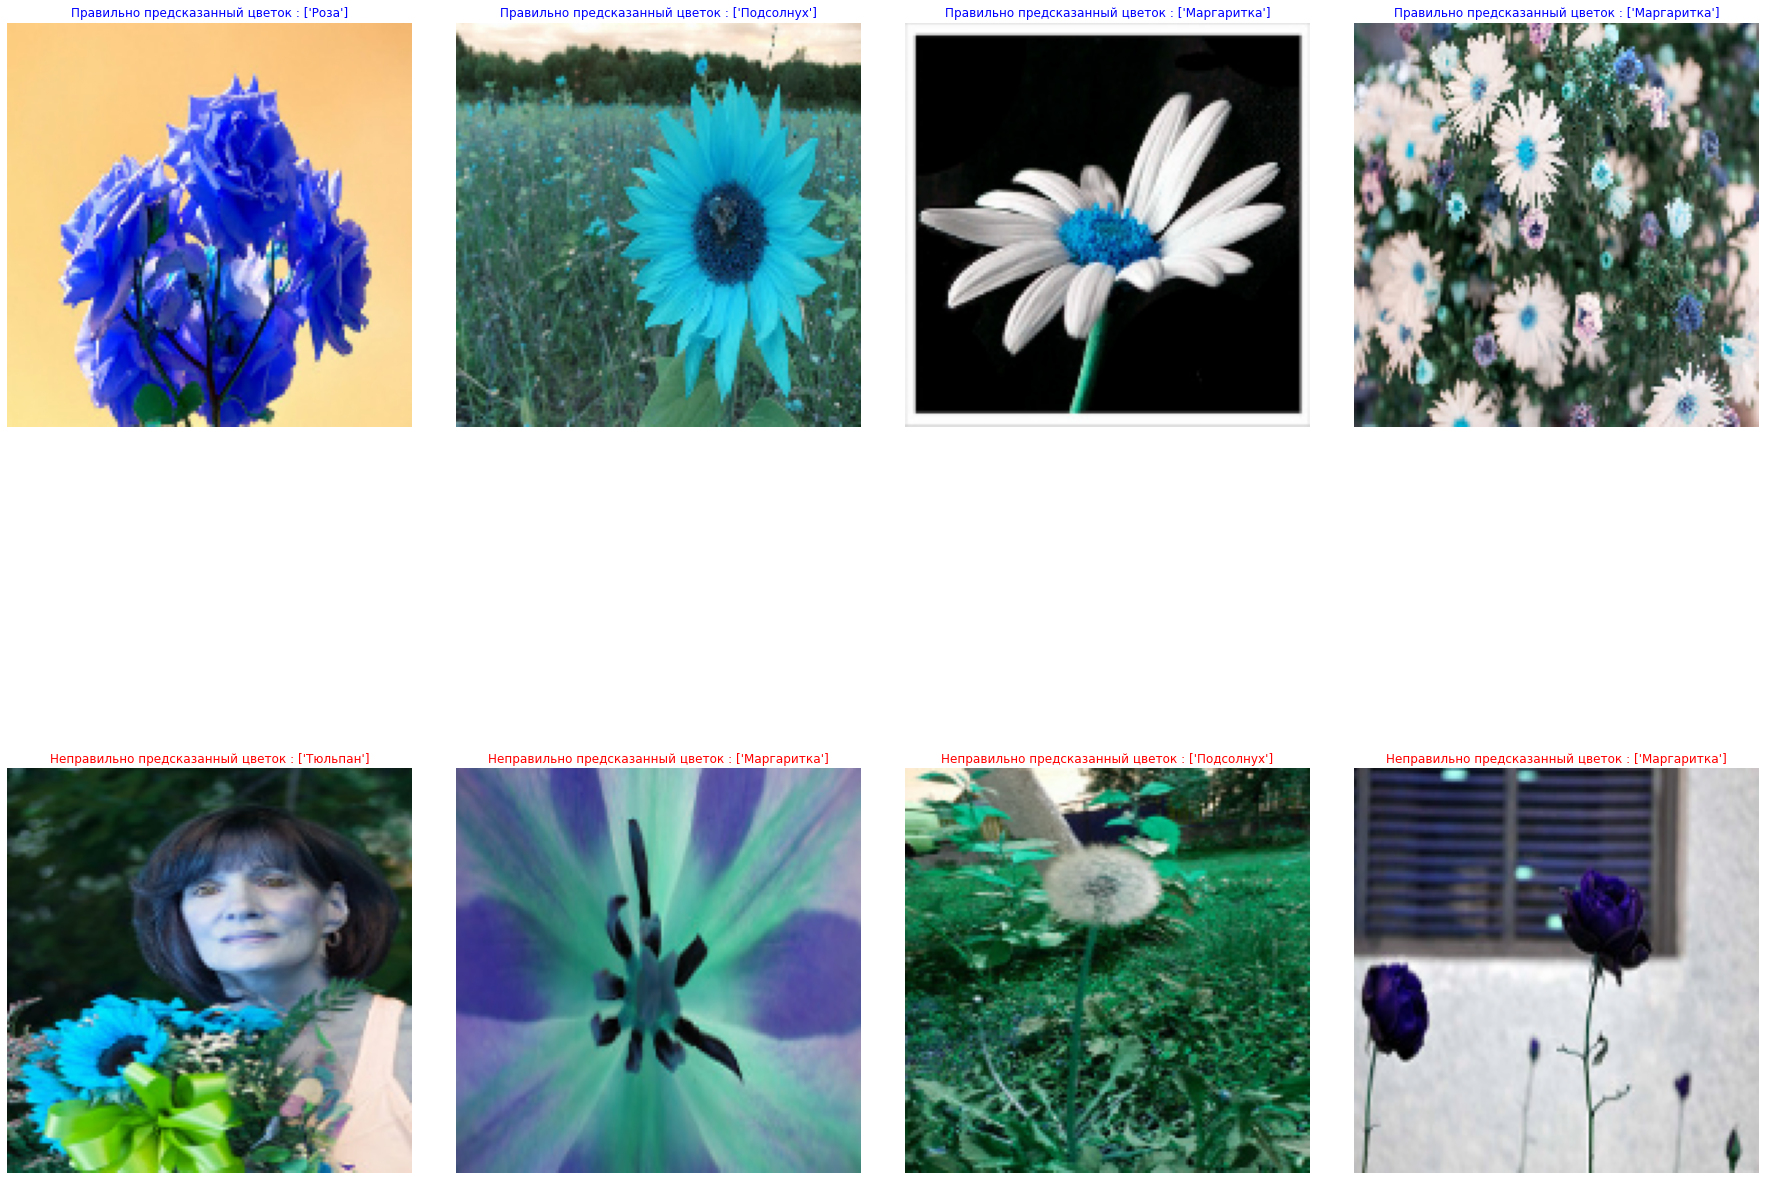

In [0]:

fig, ax = plt.subplots(2,4)
fig.set_size_inches(25,25)
for i in range (4):
  ax[0,i].imshow(X_test[prop_class[i]])
  ax[0,i].set_title("Правильно предсказанный цветок : " + str(labelEnc.inverse_transform([predicted_digits[prop_class[i]]])),color ='blue')
  ax[0,i].grid(False)
  ax[0,i].axis('off')

for i in range (4):
  ax[1,i].imshow(X_test[mis_class[i]])
  ax[1,i].set_title("Неправильно предсказанный цветок : " + str(labelEnc.inverse_transform([predicted_digits[mis_class[i]]])),color ='red')
  ax[1,i].grid(False)
  ax[1,i].axis('off')

fig.tight_layout()